## Exercises

1. Load and display the image 'dog.jfif'. Save the image in png format.

In [ ]:
!pip install matplotlib

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt

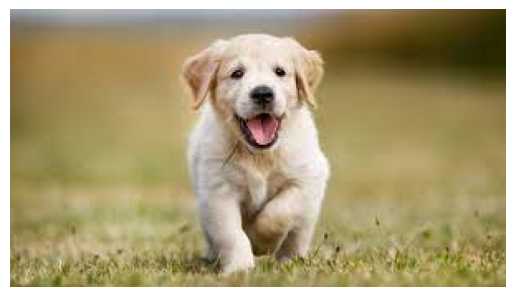

In [2]:
dog = cv.imread("images/dog.jfif")

if(dog is None):
    sys.exit("The file path is not detected")
else:
    #convert to rgb
    dog_rgb = cv.cvtColor(dog, cv.COLOR_BGR2RGB)

    #display image
    plt.imshow(dog_rgb)
    plt.axis('off')  #Hide axis
    plt.show()

    cv.imwrite("images/dog.png", dog)

2. Suggest 2 ways and write codes to display 2 images simultaneously. You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.

In [ ]:
!pip install requests pillow matplotlib

In [5]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [6]:
#getting imahe online and not save it inside my directory
url = "https://img.freepik.com/free-vector/cute-lion-jumping-cartoon-vector-icon-illustration-animal-nature-icon-concept-isolated-flat-cartoon_138676-4384.jpg?t=st=1720246215~exp=1720249815~hmac=5df8bdeb346812295b2f7dbb8415416c1d0e9c0c720a7550db5d0353fe57f7c1&w=740"
response = requests.get(url)

#Convert Byte Stream to File-like Object
img = Image.open(BytesIO(response.content))
# Convert the image to a numpy array
img_np = np.array(img)

# Convert RGB to BGR
img_bgr = cv.cvtColor(img_np, cv.COLOR_RGB2BGR)
img_gray = cv.cvtColor(img_np, cv.COLOR_RGB2GRAY)

### 1st way: Using imshow

In [38]:
titles = ["Color", "Grayscale"]
images = [img_bgr, img_gray]

for title, image in zip(titles, images):
    cv.imshow(title, image)
cv.waitKey(0)
cv.destroyAllWindows()

### 2nd way: Using pyplot

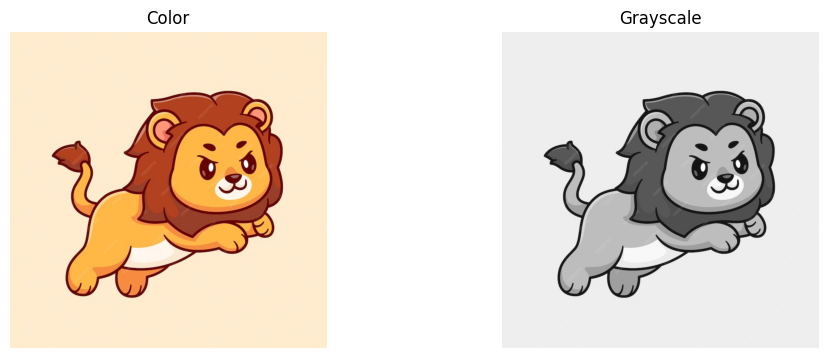

In [10]:
fig = plt.figure(figsize=(10,7))
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)

plt.imshow(img_np)
plt.axis('off') 
plt.title("Color") 

fig.add_subplot(rows, columns, 2)

#by default, plt.imshow() applies a colormap
plt.imshow(img_gray, cmap='gray')
plt.axis('off') 
plt.title("Grayscale") 

#Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

3. Write codes that performs the following:
Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"

In [39]:
#can consider audio disappear
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    raise Exception ("No video file detected")

#find for this to get more about parameters --- Parameters for cap.get() and cap.set()
#cv.CAP_PROP_FRAME_WIDTH = cap.get(3)
#cv.CAP_PROP_FRAME_HEIGHT = cap.get(4)
#cv.CAP_PROP_FPS
width = int(cap.get(3))
height = int(cap.get(4))

fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
fps = 15
new_width = int(width // 5)
new_height = int(height // 5)
dim = (new_width, new_height)

out = cv.VideoWriter("smaller_img_pexels.mp4", fourcc, fps, dim)

while cap.isOpened():
    ret, frame = cap.read() #ret is status (boolean), frame is image
    
    if not ret:
        print("No frame received")
        break
        
    # Resize the frame
    resized = cv.resize(frame, dim, interpolation = cv.INTER_LINEAR)

    # Write the resized frame to the output video
    out.write(resized)

    #show video
    cv.namedWindow("Normal") 
    cv.namedWindow("Resized")
    cv.imshow("Normal", frame)
    cv.imshow("Resized", resized)
    
    k = cv.waitKey(1) & 0xFF
    if k == 27: #means esc key
        break
    
    
cap.release()
out.release()
cv.destroyAllWindows()


4. Enlarge the image "dog.jfif" by using different techniques:
    1) Linear interpolation
   2) Cubic interpolation
   3) Nearest neighbor interpolation.

Perform profiling on each method. Comment on the **execution times** and **quality of resulting images**.

In [17]:
import time

Execution Time (Linear Interpolation): 0.0004 seconds
Execution Time (Cubic Interpolation): 0.0005 seconds
Execution Time (Nearest Neighbor Interpolation): 0.0006 seconds


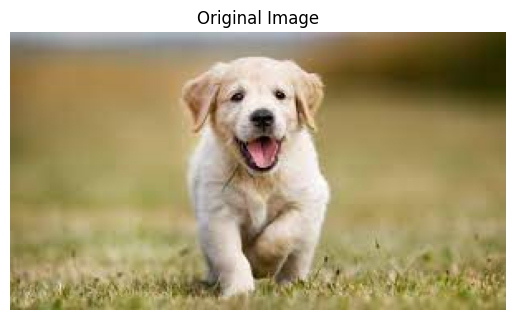

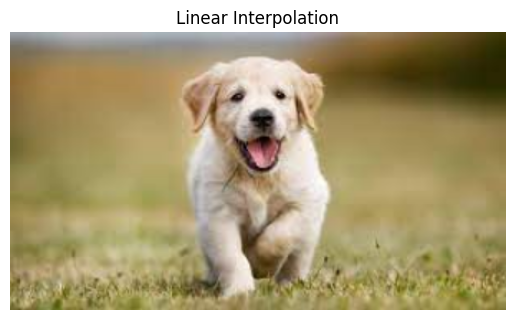

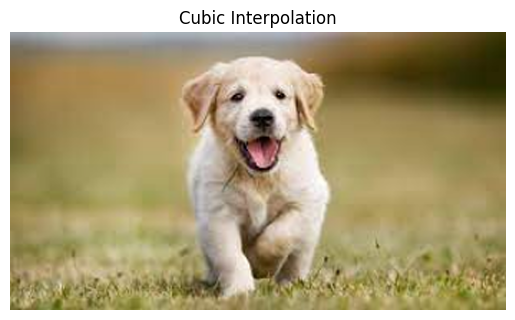

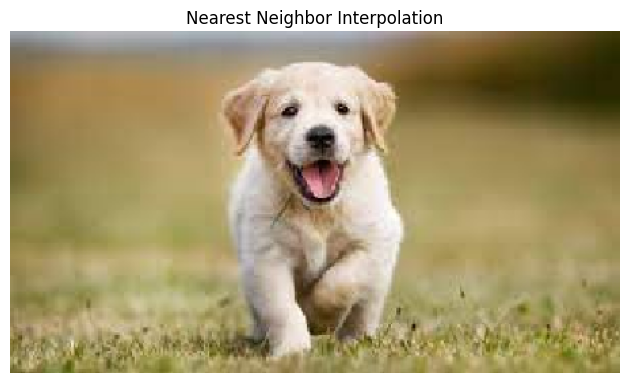

In [37]:
# Define the function for measurement
def measureTime(img, interpolation):
    start_time = time.perf_counter()
    resized_img = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=interpolation)
    execution_time = time.perf_counter() - start_time
    return resized_img, execution_time

# Load the image
img = cv.imread("images/dog.jfif")

if img is None:
    sys.exit("The file path is not detected")

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Resize using linear interpolation
resized_linear, time_linear = measureTime(img_rgb, cv.INTER_LINEAR)

# Resize using cubic interpolation
resized_cubic, time_cubic = measureTime(img_rgb, cv.INTER_CUBIC)

# Resize using nearest neighbor interpolation
resized_nearest, time_nearest = measureTime(img_rgb, cv.INTER_NEAREST)

# Print execution times
print(f"Execution Time (Linear Interpolation): {time_linear:.4f} seconds")
print(f"Execution Time (Cubic Interpolation): {time_cubic:.4f} seconds")
print(f"Execution Time (Nearest Neighbor Interpolation): {time_nearest:.4f} seconds")

# Plotting original and resized images
plt.figure()
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.figure()
plt.imshow(resized_linear)
plt.title('Linear Interpolation')
plt.axis('off')

plt.figure()
plt.imshow(resized_cubic)
plt.title('Cubic Interpolation')
plt.axis('off')

plt.figure()
plt.imshow(resized_nearest)
plt.title('Nearest Neighbor Interpolation')
plt.axis('off')

plt.tight_layout()
plt.show()

| | Linear | Cubic | Nearest Neighbor
| --- | --- | --- | ---
| Execution times | Moderate | Slowest | Fastest
| Resulting image quality |Provides smooth results, slight blurring. |Offers smoother results, preserves more details. |Fastest method, may produce jagged edges.